## Import Libraries dan Dataset

In [1]:
# Importing important libraries

# For data cleaning and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For preprocessing and building model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
# Membaca dataset hotel
train_features = pd.read_csv('train_features.csv')
train_label = pd.read_csv('train_label.csv')
test = pd.read_csv('test_feature.csv')
format = pd.read_csv('/content/submission_format.csv')

In [4]:
# melihat format submission
format

,ID,Price
0,0,22000
1,1,22000
2,2,22000
3,3,22000
4,4,22000
...,...,...
762,762,22000
763,763,22000
764,764,22000
765,765,22000


In [5]:
# melihat data train_features
train_features.head(5)

,facilities,rating,location
0,RestaurantBARSwimmingPools,7.8 Very GoodFrom 10 reviews,Stokol
1,intrnetRestaurantgym,5.6 GoodFrom 4 reviews,Machlessvile
2,restaurantgympoolBar,7.2 Very GoodFrom 38 reviews,Wanderland
3,BARRestaurant,7.3 Very GoodFrom 6 reviews,Uberlandia
4,InternetRestaurant,7.2 Very GoodFrom 30 reviews,Stokol


# Data Preprocessing dan EDA

## Analisis Kolom Fasilitas

Pada kolom feature Facilities kami menyatukan atribut-atribut yang berbeda namun  memiliki value yang sama menjadi 1 tribut saja sehingga setiap atribut pada data facilities tidak bias

In [6]:
train_features['facilities'] = train_features['facilities'].str.replace('pool', 'Pool')

train_features['facilities'] = train_features['facilities'].str.replace('restaurant', 'Restaurant')

train_features['facilities'] = train_features['facilities'].str.replace('internet', 'Internet')
train_features['facilities'] = train_features['facilities'].str.replace('intrnet', 'Internet')


train_features['facilities'] = train_features['facilities'].str.replace('BAR', 'Bar')
train_features['facilities'] = train_features['facilities'].str.replace('bar', 'Bar')

train_features['facilities'] = train_features['facilities'].str.replace('gym', 'Gym')

train_features['facilities'] = train_features['facilities'].str.replace('swimmingpools', 'Swimmingpools')
train_features['facilities'] = train_features['facilities'].str.replace('Swimmingpools', 'Swimmingpools')
train_features['facilities'] = train_features['facilities'].str.replace('swimmingPools', 'Swimmingpools')
train_features['facilities'] = train_features['facilities'].str.replace('SwimmingPools', 'Swimmingpools')

#train_features['facilities'] = train_features['facilities'].str.split('(?=[A-Z])')

In [7]:
test['facilities'] = test['facilities'].str.replace('pool', 'Pool')

test['facilities'] = test['facilities'].str.replace('restaurant', 'Restaurant')

test['facilities'] = test['facilities'].str.replace('internet', 'Internet')
test['facilities'] = test['facilities'].str.replace('intrnet', 'Internet')


test['facilities'] = test['facilities'].str.replace('BAR', 'Bar')
test['facilities'] = test['facilities'].str.replace('bar', 'Bar')

test['facilities'] = test['facilities'].str.replace('gym', 'Gym')

test['facilities'] = test['facilities'].str.replace('swimmingpools', 'Swimmingpools')
test['facilities'] = test['facilities'].str.replace('Swimmingpools', 'Swimmingpools')
test['facilities'] = test['facilities'].str.replace('swimmingPools', 'Swimmingpools')
test['facilities'] = test['facilities'].str.replace('SwimmingPools', 'Swimmingpools')

#test['facilities'] = test['facilities'].str.split('(?=[A-Z])')

In [8]:
train_features['facilities'] = train_features['facilities'].str.replace('[a-z]', '')

for column in train_features.columns:
    train_features[column].fillna(train_features[column].mode()[0], inplace=True)

train_features['facilities'] = train_features['facilities'].apply(lambda x: ''.join(sorted(x)))

<ipython-input-8-04f4815415fb>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_features['facilities'] = train_features['facilities'].str.replace('[a-z]', '')


In [9]:
test['facilities'] = test['facilities'].str.replace('[a-z]', '')

for column in test.columns:
    test[column].fillna(test[column].mode()[0], inplace=True)

test['facilities'] = test['facilities'].apply(lambda x: ''.join(sorted(x)))

<ipython-input-9-e3fe8e8d2e48>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test['facilities'] = test['facilities'].str.replace('[a-z]', '')


In [10]:
train_features.head(5)

,facilities,rating,location
0,BRS,7.8 Very GoodFrom 10 reviews,Stokol
1,GIR,5.6 GoodFrom 4 reviews,Machlessvile
2,BGPR,7.2 Very GoodFrom 38 reviews,Wanderland
3,BR,7.3 Very GoodFrom 6 reviews,Uberlandia
4,IR,7.2 Very GoodFrom 30 reviews,Stokol


In [11]:
print(train_features['facilities'].unique())

['BRS' 'GIR' 'BGPR' 'BR' 'IR' 'I' 'B' 'BIR' 'BGIPR' 'BIPR' 'PR' 'BIS' 'R'
 'BGRS' 'BGIRS' 'BIRS' 'BGP' 'IPR' 'BGIR' 'BPR' 'BI' 'BP' 'GPR' 'GS' 'BGI'
 'BIP' 'S' 'BGIS' 'IRS' 'RS' 'BGS' 'BGIP' 'P' 'GIS' 'GIPR' 'BGR' 'GRS'
 'BS' 'GIP' 'GR' 'GP' 'GIRS' 'BG']


In [12]:
test.head(5)

,ID,facilities,rating,location
0,0,BGIRS,8.0 ExcellentFrom 1 reviews,Stokol
1,1,BGIPR,7.4 Very GoodFrom 22 reviews,Hallerson
2,2,BGIS,0.0 FairFrom 4 reviews,Hallerson
3,3,BGIRS,6.8 Very GoodFrom 13 reviews,Andeman
4,4,BGIPR,0.0 FairFrom 9 reviews,Hallerson


## Analisis Kolom rating

Melihat dari data features dimana kolom rating memiliki atribut dengan 3 kategori yaitu nilai rating, kelas rating, dan jumlah reviewer. Sehingga dilakukan pemisahan pada kolom rating untuk mendapatkan fitur baru yaitu :
* kolom "rating" berisi "nilai rating"
* kolom "grade" berisi "kualitas rating"
* kolom "reviews" berisi "banyak orang yang memberikan rating"

Hal tersebut dilakukan agar mendapatkan encode yang lebih detail terhadap feature rating sehinga akurasi pada prediksi meningkat.






In [13]:
# Menambahkan kolom 'reviews'
train_features['reviews'] = train_features['rating'].str.split(' ').str[-2]

In [14]:
train_features[['rating','grade']] = train_features['rating'].str.split(' ', 1, expand=True)

<ipython-input-14-8f11eb18a839>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  train_features[['rating','grade']] = train_features['rating'].str.split(' ', 1, expand=True)


In [15]:
# Mengganti nilai pada kolom 'grade'
train_features['grade'] = train_features['grade'].str.replace('From.*', '', regex=True)
train_features

,facilities,rating,location,reviews,grade
0,BRS,7.8,Stokol,10,Very Good
1,GIR,5.6,Machlessvile,4,Good
2,BGPR,7.2,Wanderland,38,Very Good
3,BR,7.3,Uberlandia,6,Very Good
4,IR,7.2,Stokol,30,Very Good
...,...,...,...,...,...
3061,BI,10.0,Andeman,1,Excellent
3062,BIR,8.1,Uberlandia,4,Excellent
3063,BRS,6.7,Willsmian,10,Very Good
3064,R,10.0,Hallerson,1,Excellent


In [16]:
train_features['grade'].unique()

array(['Very Good', 'Good', 'Excellent', '1 review', 'Fair', '2 reviews'],
      dtype=object)

In [17]:
train_features['grade'].value_counts()

Excellent    1417
Very Good    1304
Good          260
Fair           62
1 review       20
2 reviews       3
Name: grade, dtype: int64

In [18]:
train_features['grade'] = train_features['grade'].str.replace('1 review', 'Fair')
train_features['grade'] = train_features['grade'].str.replace('2 reviews', 'Fair')

In [19]:
train_features['rating'].unique()

array(['7.8', '5.6', '7.2', '7.3', '5.4', '7.9', '10.0', '7.7', '6.9',
       '9.6', 'From', '7.4', '2.4', '8.1', '8.8', '8.0', '6.0', '6.7',
       '8.6', '7.0', '6.4', '8.4', '5.9', '7.1', '5.8', '6.2', '6.3',
       '8.2', '7.6', '6.8', '6.1', '4.0', '4.2', '8.7', '8.9', '9.3',
       '5.2', '5.7', '6.5', '4.9', '3.9', '7.5', '9.5', '8.3', '6.6',
       '5.5', '9.1', '8.5', '4.3', '9.8', '4.4', '3.6', '2.8', '5.0',
       '3.7', '9.4', '2.0', '5.3', '9.2', '5.1', '2.3', '2.5', '3.2',
       '9.0'], dtype=object)

In [20]:
modus = train_features['rating'].mode()[0]
train_features['rating'] = train_features['rating'].replace(['From'], modus)

In [21]:
# Menambahkan kolom 'grade'
test['reviews'] = test['rating'].str.split(' ').str[-2]

In [22]:
# Menambahkan kolom 'reviews'
test[['rating','grade']] = test['rating'].str.split(' ', 1, expand=True)

<ipython-input-22-eef4c3ead937>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  test[['rating','grade']] = test['rating'].str.split(' ', 1, expand=True)


In [23]:
test['grade'] = test['grade'].str.replace('From.*', '', regex=True)
test

,ID,facilities,rating,location,reviews,grade
0,0,BGIRS,8.0,Stokol,1,Excellent
1,1,BGIPR,7.4,Hallerson,22,Very Good
2,2,BGIS,0.0,Hallerson,4,Fair
3,3,BGIRS,6.8,Andeman,13,Very Good
4,4,BGIPR,0.0,Hallerson,9,Fair
...,...,...,...,...,...,...
762,762,BGPR,8.1,Andeman,9,Excellent
763,763,BGIPR,8.0,Wanderland,4,Excellent
764,764,BGIRS,7.4,Andeman,19,Very Good
765,765,BGIPR,9.0,Hallerson,17,Excellent


In [24]:
test['grade'].unique()

array(['Excellent', 'Very Good', 'Fair', 'Good'], dtype=object)

In [25]:
test['grade'].value_counts()

Very Good    334
Excellent    198
Fair         188
Good          47
Name: grade, dtype: int64

In [26]:
test['rating'].unique()

array(['8.0', '7.4', '0.0', '6.8', '7.1', '5.1', '5.8', '7.3', '4.4',
       '7.8', '8.1', '7.2', '8.7', '7.6', '9.6', '6.5', '8.5', '6.4',
       '7.5', '8.4', '6.9', '6.3', '3.6', '10.0', '7.7', '5.2', '8.2',
       '9.3', '7.9', '6.0', '4.3', '7.0', '6.6', '8.6', '9.4', '6.7',
       '9.1', '2.5', '8.9', '8.3', '6.2', '9.8', '8.8', '5.0', '9.2',
       '4.9', '5.6', '4.0', '2.0', '6.1', '2.8', '3.7', '9.0', '2.3',
       '5.4', '5.7', '5.9', '9.5', '5.5'], dtype=object)

In [27]:
#melihat data yang kosong
train_features.isnull().sum()

facilities    0
rating        0
location      0
reviews       0
grade         0
dtype: int64

In [28]:
test.isnull().sum()

ID            0
facilities    0
rating        0
location      0
reviews       0
grade         0
dtype: int64

In [29]:
train_label['Price'] = train_label['Price'].str.replace('avg/night', '')
train_label['Price'] = train_label['Price'].str.replace(',', '')
train_label

,Price
0,13500
1,13000
2,19000
3,6000
4,20000
...,...
3061,31625
3062,30500
3063,14000
3064,8500


In [30]:
train_label.dtypes

Price    object
dtype: object

In [31]:
train_label['Price'] = train_label['Price'].astype(int)

In [32]:
train_label.dtypes

Price    int64
dtype: object

## Analisis kolom Location


In [33]:
train_features['location'].unique()

array(['Stokol', 'Machlessvile', 'Wanderland', 'Uberlandia', 'Hallerson',
       'Willsmian', 'Andeman', 'Ubisville'], dtype=object)

In [34]:
len(train_features['location'].unique())

8

Pada kolom locatin terdapat data hotel dengan 8 macam lokasi dimana setiap lokasi berpengaruh terhadap harga hotel. Sehingga untuk meng encode data pada kolom location, dilakukan perbandingan rata-rata harga dari 8 macam lokasi. Lokasi dengan rata-rata harga terendah di encode dengan angka 1 dan berurutan hingga lokasi yang memiliki rata-rata tertinggi di encode dengan angka 8

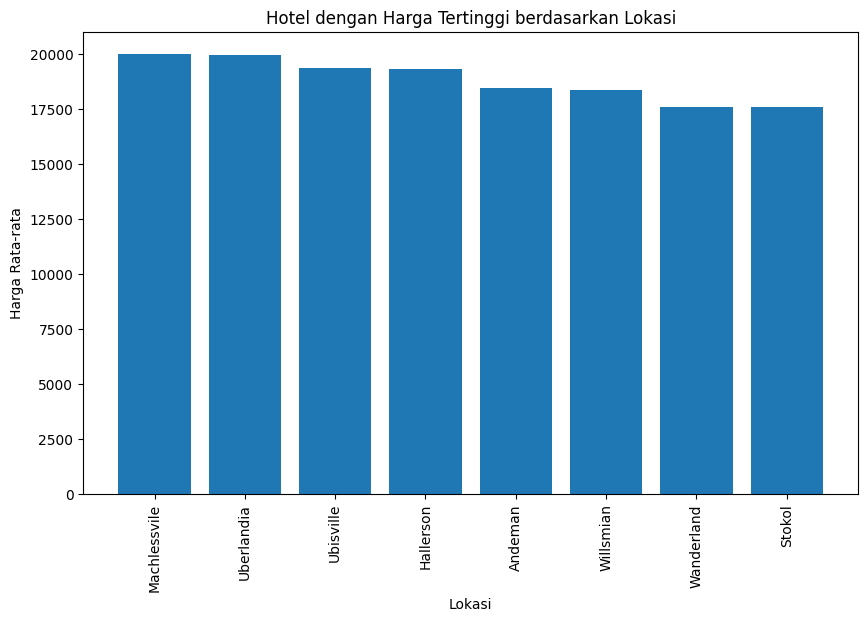

In [35]:
import matplotlib.pyplot as plt

data = pd.concat([train_features['location'], train_label['Price']], axis=1)

# Mengelompokkan data berdasarkan lokasi dan menghitung harga rata-rata
average_price = data.groupby('location')['Price'].mean()

# Mengurutkan berdasarkan harga rata-rata secara menurun
sorted_data = average_price.sort_values(ascending=False)

# Menampilkan plot bar
plt.figure(figsize=(10, 6))
plt.bar(sorted_data.index, sorted_data)
plt.xlabel('Lokasi')
plt.ylabel('Harga Rata-rata')
plt.title('Hotel dengan Harga Tertinggi berdasarkan Lokasi')
plt.xticks(rotation=90)
plt.show()

dari plot data diatas bisa dilihat bahwa Stokol adalah daerah dengan rata-rata harga hotel paling rendah, dan Machlessvile adalah daerah dengan rata-rata harga hotel paling tinggi.

sehingga dilakukan encode dengan stokol hingga Machlessvile berurutan 1 - 8

In [36]:
train_features

,facilities,rating,location,reviews,grade
0,BRS,7.8,Stokol,10,Very Good
1,GIR,5.6,Machlessvile,4,Good
2,BGPR,7.2,Wanderland,38,Very Good
3,BR,7.3,Uberlandia,6,Very Good
4,IR,7.2,Stokol,30,Very Good
...,...,...,...,...,...
3061,BI,10.0,Andeman,1,Excellent
3062,BIR,8.1,Uberlandia,4,Excellent
3063,BRS,6.7,Willsmian,10,Very Good
3064,R,10.0,Hallerson,1,Excellent


In [37]:
# Buat dictionary untuk mapping nilai lokasi ke angka
mapping = {'Stokol': 1, 'Wanderland': 2, 'Willsmian': 3, 'Andeman': 4,
           'Hallerson': 5, 'Ubisville': 6, 'Uberlandia': 7, 'Machlessvile': 8}

# Encode kolom 'location' menggunakan mapping
train_features['location'] = train_features['location'].map(mapping)

In [38]:
train_features

,facilities,rating,location,reviews,grade
0,BRS,7.8,1,10,Very Good
1,GIR,5.6,8,4,Good
2,BGPR,7.2,2,38,Very Good
3,BR,7.3,7,6,Very Good
4,IR,7.2,1,30,Very Good
...,...,...,...,...,...
3061,BI,10.0,4,1,Excellent
3062,BIR,8.1,7,4,Excellent
3063,BRS,6.7,3,10,Very Good
3064,R,10.0,5,1,Excellent


In [39]:
train_features['location'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3061    False
3062    False
3063    False
3064    False
3065    False
Name: location, Length: 3066, dtype: bool

lakukan juga pada data test

In [40]:
# Buat dictionary untuk mapping nilai lokasi ke angka
mapping = {'Stokol': 1, 'Wanderland': 2, 'Willsmian': 3, 'Andeman': 4,
           'Hallerson': 5, 'Ubisville': 6, 'Uberlandia': 7, 'Machlessvile': 8}

# Encode kolom 'location' menggunakan mapping
test['location'] = test['location'].map(mapping)

In [41]:
test

,ID,facilities,rating,location,reviews,grade
0,0,BGIRS,8.0,1,1,Excellent
1,1,BGIPR,7.4,5,22,Very Good
2,2,BGIS,0.0,5,4,Fair
3,3,BGIRS,6.8,4,13,Very Good
4,4,BGIPR,0.0,5,9,Fair
...,...,...,...,...,...,...
762,762,BGPR,8.1,4,9,Excellent
763,763,BGIPR,8.0,2,4,Excellent
764,764,BGIRS,7.4,4,19,Very Good
765,765,BGIPR,9.0,5,17,Excellent


In [42]:
test['location'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
762    False
763    False
764    False
765    False
766    False
Name: location, Length: 767, dtype: bool

nah, dapat dilihat bahwa encode sudah berhasil dan tidak ada data yang belum di encode pada kolom location baik pada data train_features dan data test

In [43]:
# Melihat Tipe Data train_features
train_features.dtypes

facilities    object
rating        object
location       int64
reviews       object
grade         object
dtype: object

In [44]:
# melihat tipe data test
test.dtypes

ID             int64
facilities    object
rating        object
location       int64
reviews       object
grade         object
dtype: object

kita lihat bahwa pada test dan train_features bahwa data yang akan di process masih type obj. Sehingga dilakukan terlebih dahulu encoding agar dapat memproses data kedalam pemodelan untuk diprediksi

In [45]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train_features.facilities = le.fit_transform(train_features.facilities)
train_features.grade = le.fit_transform(train_features.grade)

In [46]:
test.facilities = le.fit_transform(test.facilities)
test.grade = le.fit_transform(test.grade)

In [47]:
train_features['rating'] = train_features['rating'].astype(float)
train_features['reviews'] = train_features['reviews'].astype(int)
test['rating'] = test['rating'].astype(float)
test['reviews'] = test['reviews'].astype(int)

In [48]:
train_features

,facilities,rating,location,reviews,grade
0,22,7.8,1,10,3
1,26,5.6,8,4,2
2,9,7.2,2,38,3
3,21,7.3,7,6,3
4,36,7.2,1,30,3
...,...,...,...,...,...
3061,13,10.0,4,1,0
3062,16,8.1,7,4,0
3063,22,6.7,3,10,3
3064,40,10.0,5,1,0


In [49]:
test

,ID,facilities,rating,location,reviews,grade
0,0,3,8.0,1,1,0
1,1,1,7.4,5,22,3
2,2,4,0.0,5,4,1
3,3,3,6.8,4,13,3
4,4,1,0.0,5,9,1
...,...,...,...,...,...,...
762,762,5,8.1,4,9,0
763,763,1,8.0,2,4,0
764,764,3,7.4,4,19,3
765,765,1,9.0,5,17,0


karena pada data train_label tidak memiliki kolom "id" dilakukan drop terlebih dahulu kolom id pada data test dan menyimpan nya kedalam "test_cleaned" 

In [50]:
test_cleaned = test.drop('ID', axis=1)
test_cleaned

,facilities,rating,location,reviews,grade
0,3,8.0,1,1,0
1,1,7.4,5,22,3
2,4,0.0,5,4,1
3,3,6.8,4,13,3
4,1,0.0,5,9,1
...,...,...,...,...,...
762,5,8.1,4,9,0
763,1,8.0,2,4,0
764,3,7.4,4,19,3
765,1,9.0,5,17,0


## Melihat data yang relevan dengan melihat korelasi setiap feature terhadap variabel target

In [51]:
# Menggabungkan fitur dan variabel target menjadi satu dataframe
df = pd.concat([train_features, train_label], axis=1)
df

,facilities,rating,location,reviews,grade,Price
0,22,7.8,1,10,3,13500
1,26,5.6,8,4,2,13000
2,9,7.2,2,38,3,19000
3,21,7.3,7,6,3,6000
4,36,7.2,1,30,3,20000
...,...,...,...,...,...,...
3061,13,10.0,4,1,0,31625
3062,16,8.1,7,4,0,30500
3063,22,6.7,3,10,3,14000
3064,40,10.0,5,1,0,8500


In [52]:
# Menghitung korelasi Pearson antara setiap fitur dan variabel target
df.corr()

,facilities,rating,location,reviews,grade,Price
facilities,1.000000,0.036776,-0.012385,-0.045881,-0.097224,-0.159748
rating,0.036776,1.000000,0.006724,-0.133513,-0.655170,0.047518
location,-0.012385,0.006724,1.000000,0.023211,-0.004013,0.051833
reviews,-0.045881,-0.133513,0.023211,1.000000,0.223085,0.111248
grade,-0.097224,-0.655170,-0.004013,0.223085,1.000000,-0.018462
Price,-0.159748,0.047518,0.051833,0.111248,-0.018462,1.000000


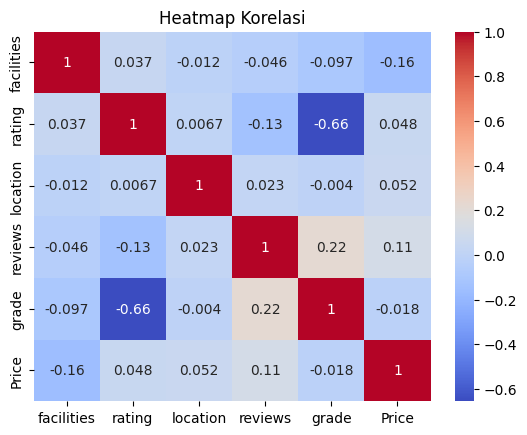

In [53]:
# Membuat heatmap dari data korelasi
corr_matrix = df.corr()  # Menghitung matriks korelasi
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # Membuat heatmap

# Menampilkan heatmap
plt.title('Heatmap Korelasi')
plt.show()

hubungan korelasi yang baik dimana -1 < korelasi < 1 yaitu dimana ketika nilai korelasi semakin mendekati -1 dan mendekati 1 korelasi nya semakin kuat. Sehingga, dari features diatas semuanya memiliki korelasi dengan variabel target sehingga tidak perlu ada feature yang dibuang.

# Data Processing

In [54]:
# Memilih fitur yang akan digunakan untuk prediksi
features = ['facilities', 'rating', 'location', 'reviews', 'grade']
target = 'Price'

In [55]:
# Memisahkan fitur dan label dari data train
X_train = train_features[features]
y_train = train_label[target]

In [56]:
# Memisahkan fitur dari data test
X_test = test_cleaned

In [57]:
# One-Hot Encoding
# = pd.concat([pd.get_dummies(df["work_year"], drop_first = True), X], axis = 1)
#X = pd.concat([pd.get_dummies(df["job_title"], drop_first = True), X], axis = 1)
#X = pd.concat([pd.get_dummies(df["remote_ratio"], drop_first = True), X], axis = 1)
#X = pd.concat([pd.get_dummies(df["employee_residence"], drop_first = True), X], axis = 1)
#X.drop(["work_year", "job_title", "remote_ratio", "employee_residence"], axis = 1, inplace = True)

# Membangun model

## Linear Regression

In [58]:
linreg = LinearRegression()

In [59]:
scores = -1 * cross_val_score(linreg, X_train, y_train, cv = 10, scoring = "neg_mean_absolute_error")

In [60]:
scores.mean()

11598.202884038126

## Ridege Regression

In [61]:
ridge = Ridge()

In [62]:
scores = -1 * cross_val_score(ridge, X_train, y_train, cv = 10, scoring = "neg_mean_absolute_error")

In [63]:
scores.mean()

11598.201092858584

In [64]:
# With Hyperparameter tuning, we can tune alpha
alpha = np.arange(0, 1, 0.01)
params = dict(alpha = alpha)
search = GridSearchCV(ridge, params, scoring = "neg_mean_absolute_error", cv = 10)
results = search.fit(X_train, y_train)
results.best_params_

{'alpha': 0.99}

In [65]:
ridge = Ridge(alpha = 0.99)
scores = -1 * cross_val_score(ridge, X_train, y_train, cv = 10, scoring = "neg_mean_absolute_error")
scores.mean()

11598.20111075743

## Lasso Regression

In [66]:
lasso = Lasso()

In [67]:
scores = -1 * cross_val_score(lasso, X_train, y_train, cv = 10, scoring = "neg_mean_absolute_error")

In [68]:
scores.mean()

11598.22288636181

In [69]:
# With Hyperparameter tuning, we can tune alpha
alpha = np.arange(0, 1, 0.01)
params = dict(alpha = alpha)
search = GridSearchCV(ridge, params, scoring = "neg_mean_absolute_error", cv = 10)
results = search.fit(X_train, y_train)
results.best_params_

{'alpha': 0.99}

In [70]:
lasso = Lasso(alpha = 0.99)
scores = -1 * cross_val_score(lasso, X_train, y_train, cv = 10, scoring = "neg_mean_absolute_error")
scores.mean()

11598.22268434495

## ElasticNET Regression

In [71]:
elastic = ElasticNet()

In [72]:
scores = -1 * cross_val_score(elastic, X_train, y_train, scoring = "neg_mean_absolute_error", cv = 10)

In [73]:
scores.mean()

11597.734959590778

In [74]:
# With Hyperparameter tuning, we can tune alpha
alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0]
l1_ratio = np.arange(0, 1, 0.01)
params = dict(alpha = alpha, l1_ratio = l1_ratio)
search = GridSearchCV(elastic, params, scoring = "neg_mean_absolute_error", cv = 10)
results = search.fit(X_train, y_train)
results.best_params_

In [75]:
elastic = ElasticNet(alpha = 1.0, l1_ratio = 0.7000000000000001)
scores = -1 * cross_val_score(elastic, X_train, y_train, scoring = "neg_mean_absolute_error", cv = 10)
scores.mean()

11597.542197100207

## Support Vector Regressor

In [76]:
svr = SVR()

In [77]:
scores = -1 * cross_val_score(svr, X_train, y_train, cv = 10, scoring = "neg_mean_absolute_error")

In [78]:
scores.mean()

11162.413115234256

## RandomForest Regressor

In [79]:
rfr = RandomForestRegressor()

In [80]:
scores = -1 * cross_val_score(rfr, X_train, y_train, cv = 10, scoring = "neg_mean_absolute_error")
scores.mean()


3250.110510524316

In [81]:
rfr = RandomForestRegressor(max_depth = 5, max_leaf_nodes = 7, 
                            min_samples_split = 10, n_estimators = 50)
scores = -1 * cross_val_score(rfr, X_train, y_train, cv = 10, scoring = "neg_mean_absolute_error")
scores.mean()

10074.033148204437

## Memilih Model dengan membandingkan berdasarkan MAE data train terkecil

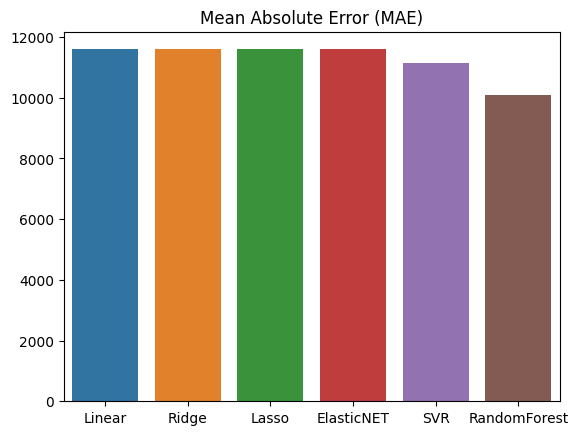

In [98]:
MAE_list = [11598.202884038126, 11598.20111075743, 11598.22268434495, 11597.542197100207, 11162.413115234256, 10095.593726152727]
models = ["Linear", "Ridge", "Lasso", "ElasticNET", "SVR", "RandomForest"]
sns.barplot(x = models, y = MAE_list)
plt.title("Mean Absolute Error (MAE)");

# Membuat Prediksi

## Linear Regression

In [83]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [84]:
linreg_pred = linreg.predict(X_test)

## Ridge

In [85]:
ridge = Ridge(alpha = 0.99)
ridge.fit(X_train, y_train)

Ridge(alpha=0.99)

In [86]:
ridge_pred = ridge.predict(X_test)

## Lasso

In [87]:
lasso = Lasso(alpha = 0.99)
lasso.fit(X_train, y_train)

Lasso(alpha=0.99)

In [88]:
lasso_pred = lasso.predict(X_test)

## ElasticNET

In [89]:
elastic = ElasticNet(alpha = 1.0, l1_ratio = 0.7000000000000001)

In [90]:
elastic.fit(X_train, y_train)

ElasticNet(l1_ratio=0.7000000000000001)

In [91]:
elastic_pred = elastic.predict(X_test)

## SVR

In [92]:
svr = SVR()

In [93]:
svr.fit(X_train, y_train)

SVR()

In [94]:
svr_pred = svr.predict(X_test)

## RandomForest Regression

In [95]:
rfr = RandomForestRegressor(max_depth = 5, max_leaf_nodes = 7, 
                            min_samples_split = 10, n_estimators = 50)


In [96]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_leaf_nodes=7, min_samples_split=10,
                      n_estimators=50)

In [99]:
rfr_pred = rfr.predict(X_test)

## Evaluasi Prediksi

In [100]:
#y_pred_train = model.predict(X_train)

In [101]:
y_sampel = y_train.sample(n=767, random_state=42)

In [102]:
# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(linreg_pred, y_sampel)
mae

13128.334543668094

In [103]:
# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(ridge_pred, y_sampel)
mae

13128.369319865713

In [104]:
# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(lasso_pred, y_sampel)
mae

13128.329345241435

In [105]:
# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(elastic_pred, y_sampel)
mae

13156.795504236723

In [106]:
# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(svr_pred, y_sampel)
mae

10922.350277135618

In [107]:
# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(rfr_pred, y_sampel)
mae

13124.843994767118

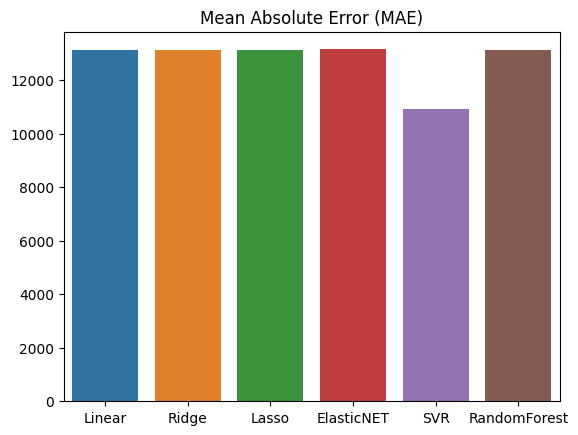

In [110]:
MAE_list = [13128.334543668094, 13128.369319865713, 13128.329345241435, 13156.795504236723, 10922.350277135618, 13124.843994767118]
models = ["Linear", "Ridge", "Lasso", "ElasticNET", "SVR", "RandomForest"]
sns.barplot(x = models, y = MAE_list)
plt.title("Mean Absolute Error (MAE)");

Model prediksi terbaik adalah SVR

# Submission

Membuat file submision

In [108]:
submission = pd.DataFrame({'ID': test['ID'], 'Price': svr_pred})
submission

,ID,Price
0,0,13779.898750
1,1,13941.584555
2,2,13795.920819
3,3,13865.580036
4,4,13845.362001
...,...,...
762,762,13822.819093
763,763,13809.117293
764,764,13913.678861
765,765,13904.841320


In [109]:
# Menyimpan submission ke file CSV
submission.to_csv('submission.csv', index=False)